# Function limits

### Notation
$\lim_{x \to a} f(x)$

### Example

$\lim_{x \to 4} \frac{x^2}{2} = \frac{4^2}{2} = 8$

In [2]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from IPython.display import display, Math

In [ ]:
x = sy.symbols('x')
fx = x**3

lim_pnt = 1.5
lim = sy.limit(fx, x, lim_pnt)

display(Math("\\lim_{x \\to %g} %s = %g" % (lim_pnt, sy.latex(fx), lim)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

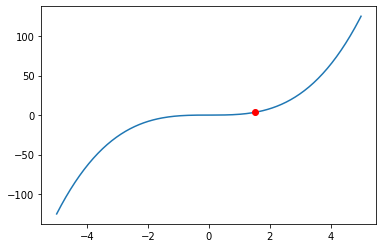

In [ ]:
fxx = sy.lambdify(x, fx)
xx = np.linspace(-5, 5, 200)

plt.plot(xx, fxx(xx))
plt.plot(lim_pnt, lim, 'ro')
display(Math("\\lim_{x \\to %g} %s = %g" % (lim_pnt, sy.latex(fx), lim)))
plt.show()

<IPython.core.display.Math object>

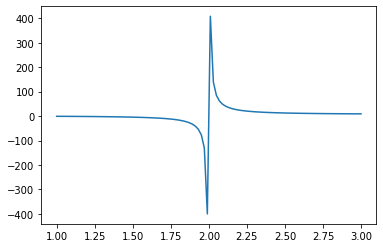

In [ ]:
fx = (x**2)/(x-2)
fxx = sy.lambdify(x, fx)
xx = np.linspace(1, 3, 102)

lim_pnt = 2
lim = sy.limit(fx, x, lim_pnt, dir='-')

plt.plot(xx, fxx(xx))
display(Math("\\lim_{x \\to %g-} %s = %s" % (lim_pnt, sy.latex(fx), sy.latex(lim))))
plt.show()

<IPython.core.display.Math object>

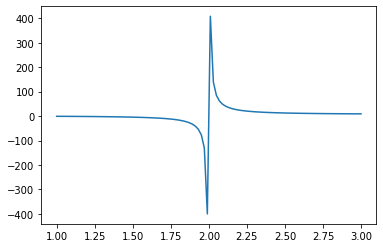

In [ ]:
lim = sy.limit(fx, x, lim_pnt, dir='+')

plt.plot(xx, fxx(xx))
display(Math("\\lim_{x \\to %g+} %s = %s" % (lim_pnt, sy.latex(fx), sy.latex(lim))))
plt.show()

# Exercise (part 1)

$f(x) = e^{-x}\sqrt{x + 1} \\
g(x) = cos(x + sin(x))$

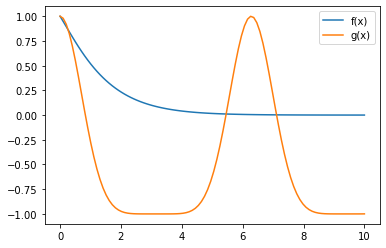

In [ ]:
x = sy.symbols('x')
fx = sy.exp(-x) * sy.sqrt(x + 1)
gx = sy.cos(x + sy.sin(x))

fxx = sy.lambdify(x, fx)
gxx = sy.lambdify(x, gx)

xx = np.linspace(0, 10, 100)

plt.plot(xx, fxx(xx), label='f(x)')
plt.plot(xx, gxx(xx), label='g(x)')
plt.legend()
plt.show()

# Exercise (part 2)

$\frac{\lim_{x \to 5}f(x)}{\lim_{x \to 5}g(x)} = lim_{x \to 5}\frac{f(x)}{g(x)} $

In [ ]:
lim_pnt = 5
lim_fx = sy.limit(fx, x, lim_pnt)
lim_gx = sy.limit(gx, x, lim_pnt)

display(Math("\\frac{\\lim_{x \\to %g} f(x)}{\\lim_{x \\to %g} g(x)} = \\frac{%g}{%g} = %g" \
             % (lim_pnt, lim_pnt, lim_fx, lim_gx, lim_fx/lim_gx)))
print()
display(Math("\\lim_{x \\to %g}\\frac{f(x)}{g(x)} = %g" % (lim_pnt, sy.limit(fx/gx, x, lim_pnt))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Piecewise Functions

In [ ]:
from sympy.abc import x

piece1 = 0
piece2 = -2*x
piece3 = x**3/10

fx = sy.Piecewise((piece1, x<0), (piece2, (x>=0) & (x<10)), (piece3, x>=10))
fx

Piecewise((0, x < 0), (-2*x, x < 10), (x**3/10, True))

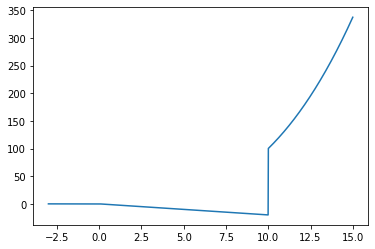

In [ ]:
fxx = sy.lambdify(x, fx)
xx = np.linspace(-3, 15, 1234)

plt.plot(xx, fxx(xx))
plt.show()

# Exercise

<IPython.core.display.Math object>

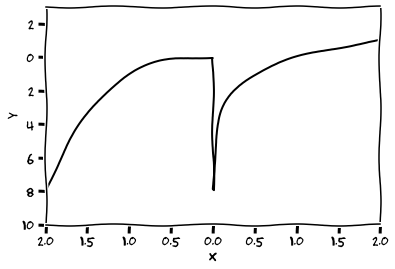

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

piece1 = x**3
piece2 = sy.log(x, 2)

fx = sy.Piecewise((piece1, x<=0), (piece2, x>0))
display(Math(f"f(x) = {sy.latex(fx)}"))

fxx = sy.lambdify(x, fx)
xx = np.linspace(-3, 5, 1234)

with plt.xkcd():
  plt.plot(xx, fxx(xx), 'k')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([-2, 2])
plt.ylim([-10, 3])
plt.show()

# Derivative of polynomials

In [ ]:
x = sy.symbols("x")

fx = x**2
dfx = sy.diff(fx)
dfx

2*x

In [ ]:
print("Leibniz notation")
display(Math(f"f(x) = {sy.latex(fx)}, \\quad \\frac{{df}}{{dx}} = {sy.latex(dfx)}"))

print("\nLagrange notation")
display(Math(f"f(x) = {sy.latex(fx)}, \\quad f'(x) = {sy.latex(dfx)}"))

print("\nNewton notation")
display(Math(f"f(x) = {sy.latex(fx)}, \\quad \\dot f = {sy.latex(dfx)}"))

Leibniz notation


<IPython.core.display.Math object>


Lagrange notation


<IPython.core.display.Math object>


Newton notation


<IPython.core.display.Math object>

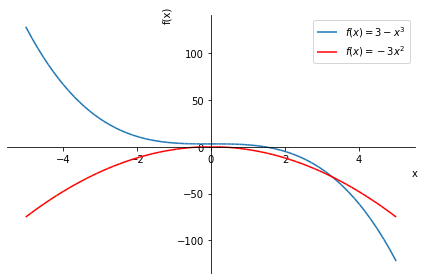

In [ ]:
import sympy.plotting.plot as syplt

fx = 3 - x**3
p = syplt(fx, (x, -5, 5), show=False)
p.extend(syplt(sy.diff(fx), (x, -5, 5), show=False))
p[1].line_color = 'r'
p[0].label = '$f(x) = %s$' % sy.latex(fx)
p[1].label = '$f(x) = %s$' % sy.latex(sy.diff(fx))

p.legend = True
p.show()

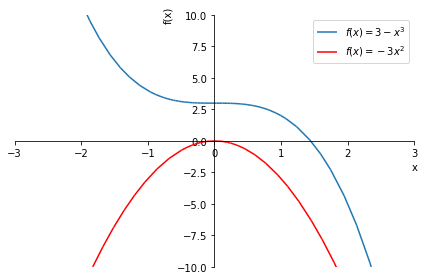

In [ ]:
p.xlim = [-3, 3]
p.ylim = [-10, 10]
p.show()

# Exercise

## Function

$f(x) = 3 + 2x - 5x^2 + 7x^4 \\
g(x) = 4x^2 + x^5$

## Derivatives: product rule and summation rule

$(f + g)' = f' + g' \\
(f \times g)' \neq f' \times g' \\
(f \times g)' = f' \times g + f \times g'$



In [ ]:
x = sy.symbols("x")

fx = 3+2*x - 5*x**2 + 7*x**4
gx = 4*x**2 + x**5

dfx = sy.diff(fx)
dgx = sy.diff(gx)

display(fx)
display(gx)
display(dfx)
display(dgx)

7*x**4 - 5*x**2 + 2*x + 3

x**5 + 4*x**2

28*x**3 - 10*x + 2

5*x**4 + 8*x

In [ ]:
# Summation rule -> (f + g)′ = f′ + g′

sum_then_diff = sy.diff(fx+gx)
diffs_then_sum = dfx+dgx
display(Math(f"{sy.latex(sum_then_diff)} = {sy.latex(diffs_then_sum)}"))
sy.latex(sum_then_diff) == sy.latex(diffs_then_sum)

<IPython.core.display.Math object>

True

In [ ]:
# Without product rule -> (f × g)′ ≠ f′ × g′

product_then_diff = sy.diff(fx*gx)
diff_then_product = dfx * dgx
display(Math("\\text{Without applying the product rule:}"))
display(Math(f"{sy.latex(product_then_diff)} \\neq {sy.latex(diff_then_product)}"))
product_then_diff != diff_then_product

<IPython.core.display.Math object>

<IPython.core.display.Math object>

True

In [ ]:
# Product rule -> (f × g)′ = f′ × g + f × g′

product_then_diff = sy.diff(fx*gx)
product_rule = dfx*gx + fx*dgx
display(Math("\\text{Applying the product rule:}"))
display(Math(f"{sy.latex(product_then_diff)} = {sy.latex(product_rule)}"))
product_then_diff == product_rule

<IPython.core.display.Math object>

<IPython.core.display.Math object>

True

In [ ]:
q = sy.symbols("q")

display(sy.diff(sy.cos(q)))
display(sy.diff(sy.sin(q)))

-sin(q)

cos(q)

In [ ]:
f = sy.cos(q)

for i in range(0, 8):
  display(Math("\\frac{d}{dx}%s = %s" % (sy.latex(f), sy.latex(sy.diff(f)))))
  print()
  f = sy.diff(f)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

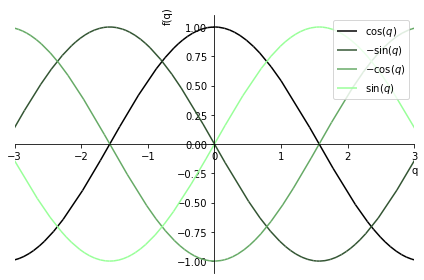

In [ ]:
f = sy.cos(q)

for i in range(0, 4):
  if i == 0:
    p = syplt(f, show=False, label=f"${sy.latex(f)}$", line_color=(i/5, i/3, i/5))
  else:
    p.extend(syplt(f, show=False, label=f"${sy.latex(f)}$", line_color=(i/5, i/3, i/5)))
  f = sy.diff(f)

p.legend = True
p.xlim = [-3, 3]
p.show()

# Exercise

$f_a(x) = cos(x + sin(x)) + a \\
a \in \{0, 1, 2, 3\}$

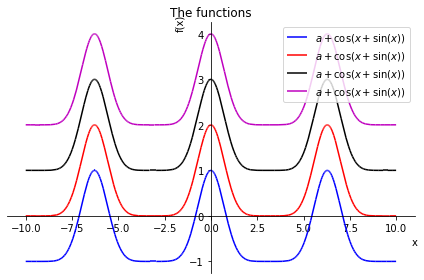

In [ ]:
x, a = sy.symbols("x, a")
fx = sy.cos(x + sy.sin(x)) + a

colors = 'brkm'
for  i in range(0, 4):
  fx_mapped = fx.subs({a: i})
  if i == 0:
    p = syplt(fx_mapped, show=False, label=f"${sy.latex(fx)}$", line_color=colors[i])
  else:
    p.extend(syplt(fx_mapped, show=False,  label=f"${sy.latex(fx)}$", line_color=colors[i]))

p.title = "The functions"
p.legend = True
p.show()

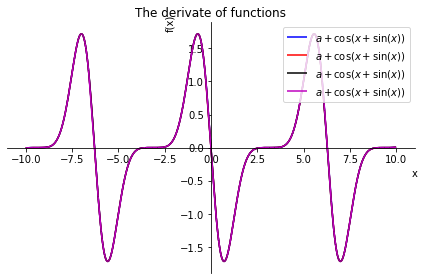

In [ ]:
x, a = sy.symbols("x, a")
fx = sy.cos(x + sy.sin(x)) + a

colors = 'brkm'
for  i in range(0, 4):
  dfx = sy.diff(fx.subs({a: i}))
  if i == 0:
    p = syplt(dfx, show=False, label=f"${sy.latex(fx)}$", line_color=colors[i])
  else:
    p.extend(syplt(dfx, show=False,  label=f"${sy.latex(fx)}$", line_color=colors[i]))

p.title = "The derivate of functions"
p.legend = True
p.show()

# Tangent lines: Concept and formula

$t = f'_a(x - x_a) + f_a \\
y_0 - y_1 = m(x_0 - x_1) $

## Slope-intercept form

$y = mx + b$

## Where

$m = f'_a \\
x = (x - x_a) \\
f_a = b$

## Then

$t = f'_a(x - x_a) + f_a \\
y = m \quad x\quad \quad + b$

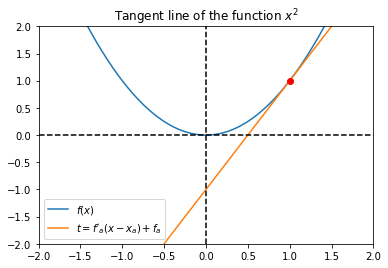

In [ ]:
x = sy.symbols("x")

f = x**2
df = sy.diff(f)

xa = 1

fa = f.subs(x, xa)
dfa = df.subs(x, xa)

start = -(1+abs(xa))
end = 1+abs(xa)
xx = np.linspace(start, end, 200)
f_result = sy.lambdify(x, f)(xx)
df_result = sy.lambdify(x, df)(xx)

tanline = dfa * (xx-xa) + fa

plt.plot(xx, f_result, label='$f(x)$')
plt.plot(xx, tanline, label="$t = f'_a(x - x_a) + f_a$")
plt.plot(xa, fa, 'ro')

plt.title(f"Tangent line of the function ${sy.latex(f)}$")
plt.axis([start, end, start, end])
plt.legend()

ax = plt.gca()
plt.plot(ax.get_xlim(), [0, 0], 'k--')
plt.plot([0, 0], ax.get_ylim(), 'k--')

plt.show()

# Exercise

Create a function that returns the tangent line, given a function, $x_a$, and domain bounds.

Generate this plot using $f = x^2$ and $x_a \in (-2, 2)$

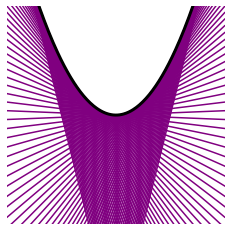

In [ ]:
x, a = sy.symbols("x, a")
fx = x**2
dfx = sy.diff(fx)

xx = np.linspace(-2, 2, 200)
xxa = np.linspace(-2, 2, 200)

fxx = sy.lambdify(x, fx)

for xa in np.linspace(-2, 2, 100):
  fa = fx.subs(x, xa)
  dfa = df.subs(x, xa)
  t = dfa*(xx - xa) + fa
  plt.plot(xx, t, 'purple')

plt.plot(xx, fxx(xx), 'k', linewidth=3)

plt.axis('square')
plt.axis('off')
plt.axis([-2, 2, -2, 2])
plt.show()

In [ ]:
def compute_tangent(x, f, xa, bounds):
  df = sy.diff(f)
  fa = f.subs(x, xa)
  dfa = df.subs(x, xa)

  xx = np.linspace(bounds[0], bounds[1], 200)
  return dfa* (xx-xa) + fa

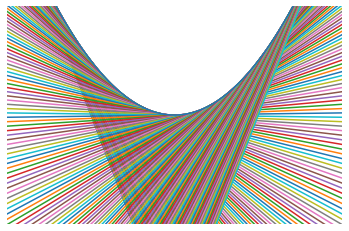

In [ ]:
x = sy.symbols('x')
f = x**2
xx = np.linspace(-2, 2, 200)
f_results = sy.lambdify(x, f)(xx)

for xa in xx:
  tanline = compute_tangent(x, f, xa, xx[[0, -1]])
  plt.plot(xx, tanline)

plt.plot(xx, f_results)
plt.axis('off')
plt.axis([xx[0], xx[-1], xx[0], xx[-1]])
plt.show()

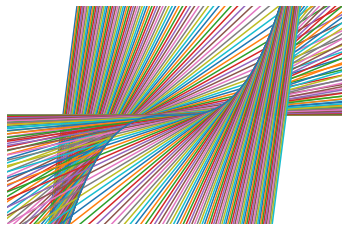

In [ ]:
x = sy.symbols('x')
f = x**3
xx = np.linspace(-2, 2, 200)
f_results = sy.lambdify(x, f)(xx)

for xa in xx:
  tanline = compute_tangent(x, f, xa, xx[[0, -1]])
  plt.plot(xx, tanline)

plt.plot(xx, f_results)
plt.axis('off')
plt.axis([xx[0], xx[-1], xx[0], xx[-1]])
plt.show()

# Critical points

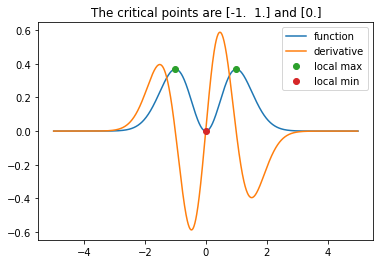

In [ ]:
from scipy.signal import find_peaks

# empirical method

x = np.linspace(-5, 5, 1001)
fx = x**2 * np.exp(-x**2)
dfx = np.diff(fx)/(x[1]-x[0])
# or
# dfx = np.diff(fx)/np.diff(x) 

localmax = find_peaks(fx)[0]
localmin = find_peaks(-fx)[0]

plt.title(f"The critical points are {x[localmax]} and {x[localmin]}")
plt.plot(x, fx, label='function')
plt.plot(x[:-1], dfx, label='derivative')
plt.plot(x[localmax], fx[localmax], 'o', label='local max')
plt.plot(x[localmin], fx[localmin], 'o', label='local min')
plt.legend()
plt.show()

In [ ]:
x = sy.symbols("x")
fx = x**2 * sy.exp(-x**2)

dfx = sy.diff(fx)
crit_points = sy.solve(dfx)
print(f"The critical points are {crit_points}")
dfx

The critical points are [-1, 0, 1]


-2*x**3*exp(-x**2) + 2*x*exp(-x**2)

# Exercise

Determine which values of a give the function a critical value at x=1 or x=2

$f(x, a) = x^2e^{-ax^2} \\
a \in \{0, .25, .5, ..., 2\}$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

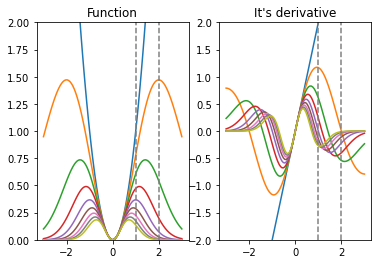

In [ ]:
x, a = sy.symbols("x, a")
base_expr = x**2 * sy.exp(-a*x**2)

alist = np.arange(0, 2.25, .25)
xlist = np.linspace(-3, 3, 100)

fig, ax = plt.subplots(1, 2)

for ai in alist:
    fxa = base_expr.subs(a, ai)
    dfxa = sy.diff(fxa)
    critical_points = sy.solve(dfxa)
    if 1 in critical_points:
      display(Math("\\Rightarrow %s \\text{ has critical point at x = 1. Woohoo!! }" % (
          sy.latex(fxa.subs({a: 1}).expand())
      )))
    elif 2 in critical_points:
      display(Math("\\Rightarrow %s \\text{ has critical point at x = 2. Woohoo!! }" % (
          sy.latex(fxa.subs({a: 2}).expand())
      )))
    else:
      display(Math("\\quad %s \\text{ has NO critical point at x = 1 or x = 2.}" % sy.latex(fxa)))

    ax[0].plot(xlist, sy.lambdify(x, fxa)(xlist))
    ax[1].plot(xlist, sy.lambdify(x, dfxa)(xlist))

ax[0].set_ylim([0, 2])
ax[0].set_title("Function")
ax[0].plot([1, 1], [0, 2], '--', color='gray')
ax[0].plot([2, 2], [0, 2], '--', color='gray')

ax[1].set_ylim([-2, 2])
ax[1].set_title("It's derivative")
ax[1].plot([1, 1], [-2, 2], '--', color='gray')
ax[1].plot([2, 2], [-2, 2], '--', color='gray')

plt.show()

# Partial derivatives

$f(x, y) = 2xy^2 \\
\frac{\partial f}{\partial x} = f_x = 2y^2 \\
\frac{\partial f}{\partial y} = f_y = 4xy$

In [ ]:
from sympy.abc import x, y

f = x**2 + x*y**2

display(Math('\\frac{\\partial f}{\\partial x} = %s' % sy.latex(sy.diff(f, x))))
print()
display(Math('\\frac{\\partial f}{\\partial y} = %s' % sy.latex(sy.diff(f, y))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercise

$f(x, y) = x^2 + xy^2 \\
\frac{\partial f}{\partial x} = 2x + y^2 \\
\frac{\partial f}{\partial y} = 2xy$

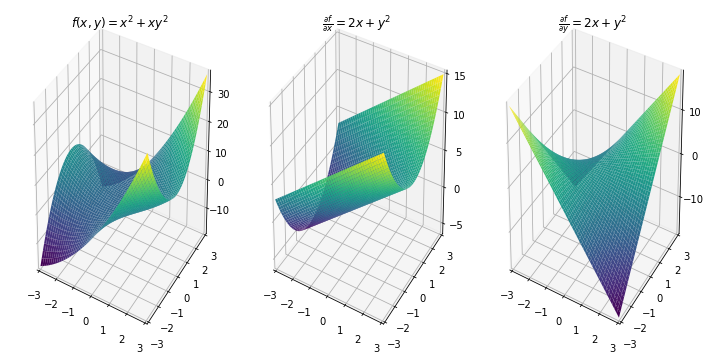

In [ ]:
from sympy.plotting import plot3d, PlotGrid

fxy = x**2 + x*y**2
pfx = sy.diff(fxy, x)
pfy = sy.diff(fxy, y)

p3d_1 = plot3d(fxy, (x, -3, 3), (y, -3, 3), title=f"$f(x, y) = {sy.latex(fxy)}$", show=False)
p3d_2 = plot3d(pfx, (x, -3, 3), (y, -3, 3), title="$\\frac{\partial f}{\partial x} = %s$" % sy.latex(pfx), show=False)
p3d_3 = plot3d(pfy, (x, -3, 3), (y, -3, 3), title="$\\frac{\partial f}{\partial y} = %s$" % sy.latex(pfx), show=False)
pgrid = PlotGrid(1, 3, p3d_1, p3d_2, p3d_3, show=False, size=(10, 5))
pgrid.show()

# Integral

$\int_{a}^{b} f(x)dx$

# Indefinite integral of polynomials

$\int bx^a dx = \frac{bx^{a + 1}}{a + 1} + c $

$\int 4x^2 dx = \frac{4x^3}{3} + c$

In [ ]:
x = sy.symbols("x")

f = x

sy.integrate(f)

x**2/2

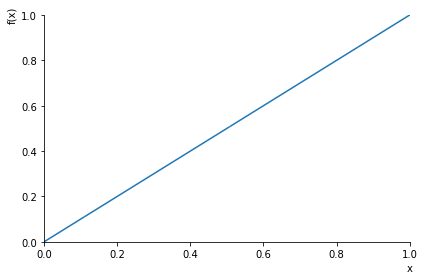

In [ ]:
p = sy.plotting.plot(f, show=False)
p.xlim = [0, 1]
p.ylim = [0, 1]
p.show()

In [ ]:
# The area above is the same as 1/2 (half)

sy.integrate(f, (x, 0, 1))

1/2

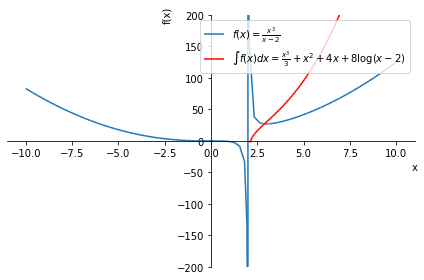

In [ ]:
f = x**3 / (x-2)

intf = sy.integrate(f)
p = sy.plotting.plot(f, show=False)
p.extend(sy.plotting.plot(intf, (x, 2.1, 10), show=False, line_color='r'))

p[0].label = '$f(x) = %s$' % sy.latex(f)
p[1].label = '$\\int f(x) dx = %s$' % sy.latex(intf)

p.ylim = [-200, 200]
p.legend = True
p.show()

# Exercise: Fundamental theorem of calculus

$\int f(x)' \text{ } dx = f(x)$

$f(x) = 2x^3 + sin(x)$


In [ ]:
x = sy.symbols("x")

fx = 2*x**3 + sy.sin(x)
dfx = sy.diff(fx)
ifx = sy.integrate(dfx)

#fx == ifx
display(Math("f(x) = %s" % sy.latex(fx)))
print()
display(Math("f'(x) = %s" % sy.latex(dfx)))
print()
display(Math("\\int (f\') \\text{ } dx = %s" % sy.latex(ifx)))
print()
display(Math("%s = %s" % (sy.latex(fx), sy.latex(ifx))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Formula to draw area of two functions between a and b

$\int_{a}^{b}[f(x) - g(x)] \text{ } dx$



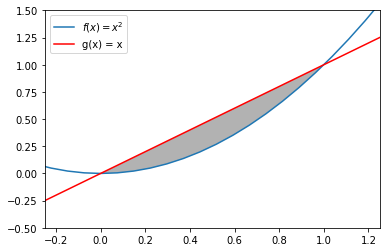

In [ ]:
x = sy.symbols("x")

syf = x**2
syg = x

fx = sy.lambdify(x, syf)
gx = sy.lambdify(x, syg)

xx = np.linspace(-2, 2, 55)

# add patch
xpatch = np.linspace(0, 1, 100)
ypatch = np.vstack((gx(xpatch), fx(xpatch))).T

fig, ax = plt.subplots()
ax.add_patch(Polygon(ypatch, facecolor='k', alpha=.3))

plt.plot(xx, fx(xx))
plt.plot(xx, gx(xx), 'r')

plt.legend(["$f(x) = %s$" % sy.latex(syf), 
            "g(x) = %s" % sy.latex(syg)])
plt.axis([-.25, 1.25, -.5, 1.5])
plt.show()

# Exercise: 

## Computing the area between two functions

The area between two functions is given by the formula $A = \int_{a}^{b} f(x) - g(x) \text{ } dx$

In our example, $f(x) = x^2$ and $g(x) = x$

Therefore, $A = \int_{a}^{b} (x^2 - x) \text{ } dx$

We will compute the area between the two crossing points, that is, where the two functions are equal. This is given by the two solutions to the equation

The two solutions are x = 0 and x = 1. This give us the definite integral of $A = \int_{0}^{1} (x^2 - x) \text{ } dx$

The final answer will be given in the code below.

In [3]:
x = sy.symbols("x")

fx = x**2
gx = x

fg_intersect = sy.solve(fx - gx) 
display(Math("f(x) \\text{ and } g(x) \\text{ intersect at } x=%g \\text{ and } x=%g" % (fg_intersect[0], fg_intersect[1])))
print()

area_fgx = sy.Abs(sy.integrate((fx - gx), (x, fg_intersect[0], fg_intersect[1])))
display(Math("\\text{The area of the function:} \\\\ A = \\int_{0}^{1} (x^2 - x) \\text{ } dx = %s" % sy.latex(area_fgx)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>